<div class="alert alert-info">
    

# Bonus Assignment 1: Walmart Weekly Sales
# MSDS420 
<br>
<br>

    
**Author:**  Atef Bader, PhD
    
**Last Edit:**  2/5/2023

<br>
</div>

# Important Note:

- This assigement requires at least PostgreSQL 9.5 or  higher release since this assignments uses **ROLLUP** and **CUBE** grouping operations

- Curently the DSCC has a PostgreSQL 10.5 that we will use for this assignment


 
# Deliverables:

- Submit a single zip-compressed file that has the name: YourLastName_Assignment_5 that has the following files:

 1. Your **PDF document** that has your Source code and output
 2. Your **ipynb script** that has your Source code and output


# Objectives:

- Experiment with SQL grouping operations like CUBE and ROLLUP to retrieve, group and cluster data from Walmart dataset
- Use Ecnomic data to analyze and visualize the weekly total sales per Walmart-store




# Submission Formats :

Create a folder or directory with all supplementary files with your last name at the beginning of the folder name, compress that folder with zip compression, and post the zip-archived folder under the assignment link in Canvas. The following files should be included in an archive folder/directory that is uploaded as a single zip-compressed file. (Use zip, not StuffIt or any 7z or any other compression method.)


1. Complete IPYNB script that has the source code in Python used to access and analyze the data. The code should be submitted as an IPYNB script that can be be loaded and run in Jupyter Notebook for Python
2. Output from the program, such as console listing/logs, text files, and graphics output for visualizations. If you use the Data Science Computing Cluster or School of Professional Studies database servers or systems, include Linux logs of your sessions as plain text files. Linux logs may be generated by using the script process at the beginning of your session, as demonstrated in tutorial handouts for the DSCC servers.
3. List file names and descriptions of files in the zip-compressed folder/directory.


Formatting Python Code
When programming in Python, refer to Kenneth Reitz’ PEP 8: The Style Guide for Python Code:
http://pep8.org/ (Links to an external site.)Links to an external site.
There is the Google style guide for Python at
https://google.github.io/styleguide/pyguide.html (Links to an external site.)Links to an external site.
Comment often and in detail.






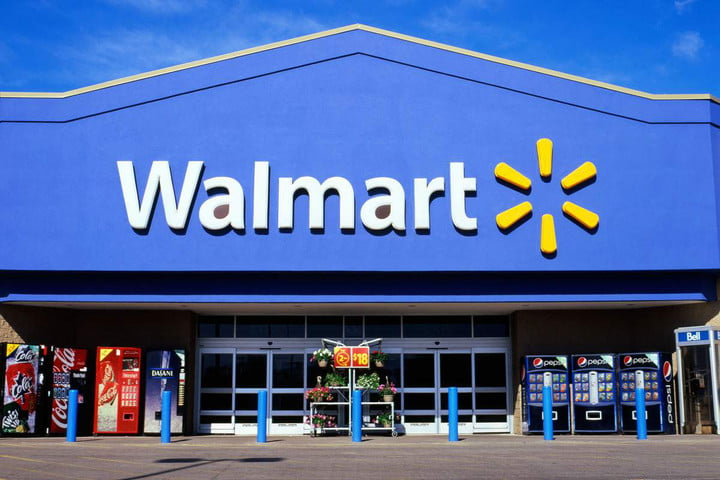

# Descriptions and Requirement Specifications

## Walmart Weekly Sales

Walmart is  the world's largest company by revenue, it has over US$500 billion; Walmart has 11,718 stores and clubs in 28 countries. 


You can read more about Walmart by visitin the following page __[More Info](https://en.wikipedia.org/wiki/Walmart)__ 

## Walmart total weekly sales

Walmart tracks the total weekly sales per store and there is a sample dataset that is published on **Kaggle**, you can read more about this dataset  __[here](https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting)__ 

In this assignment we will not discuss the store sales **prediction**, rather we will focus on store sales **description**

**Note:** Unlike the employment weekly numbers, the CPI is published monthly by LBS even though it is listed on a weekly basis teh given dataset.

The walmart database is composed of 3 tables that are populated on PosgeSQL10.5 on DSCC. The tables are listed below:

#### Stores:
- Store: The store number. Range from 1-45.
- Type: Three types of stores ‘A’, ‘B’ or ‘C’.
- Size: Sets the size of a Store would be calculated by the no. of products available in the particular store ranging from 34,000 to 210,000.

#### Weekly_Sales: 
- Store: The store which observation in recorded 1-45.
- Dept: One of 1-99 that shows the department.
- IsHoliday: Boolean value representing a holiday week or not.


#### Features: 
- Temperature:Temperature of the region during that week.
- Fuel_Price: Fuel Price in that region during that week.
- MarkDown1:5 : Represents the Type of markdown and what quantity was available during that week.
- CPI: Consumer Price Index during that week.
- Unemployment: The unemployment rate during that week in the region of the store.



# Bureau of Labor Statistics

The Bureau of Labor Statistics __[(BLS)](https://www.bls.gov/home.htm)__  of the U.S. Department of Labor publishes many of the  monthly and weekly MAJOR ECONOMIC INDICATORS that are used to measure the labor market, inflation and price changes in the economy.  You can read more about these indicators __[here](https://www.bls.gov/bls/newsrels.htm#major)__ 

Examples of these indicators that you will see in the database for this assignment are unemployement and CPI



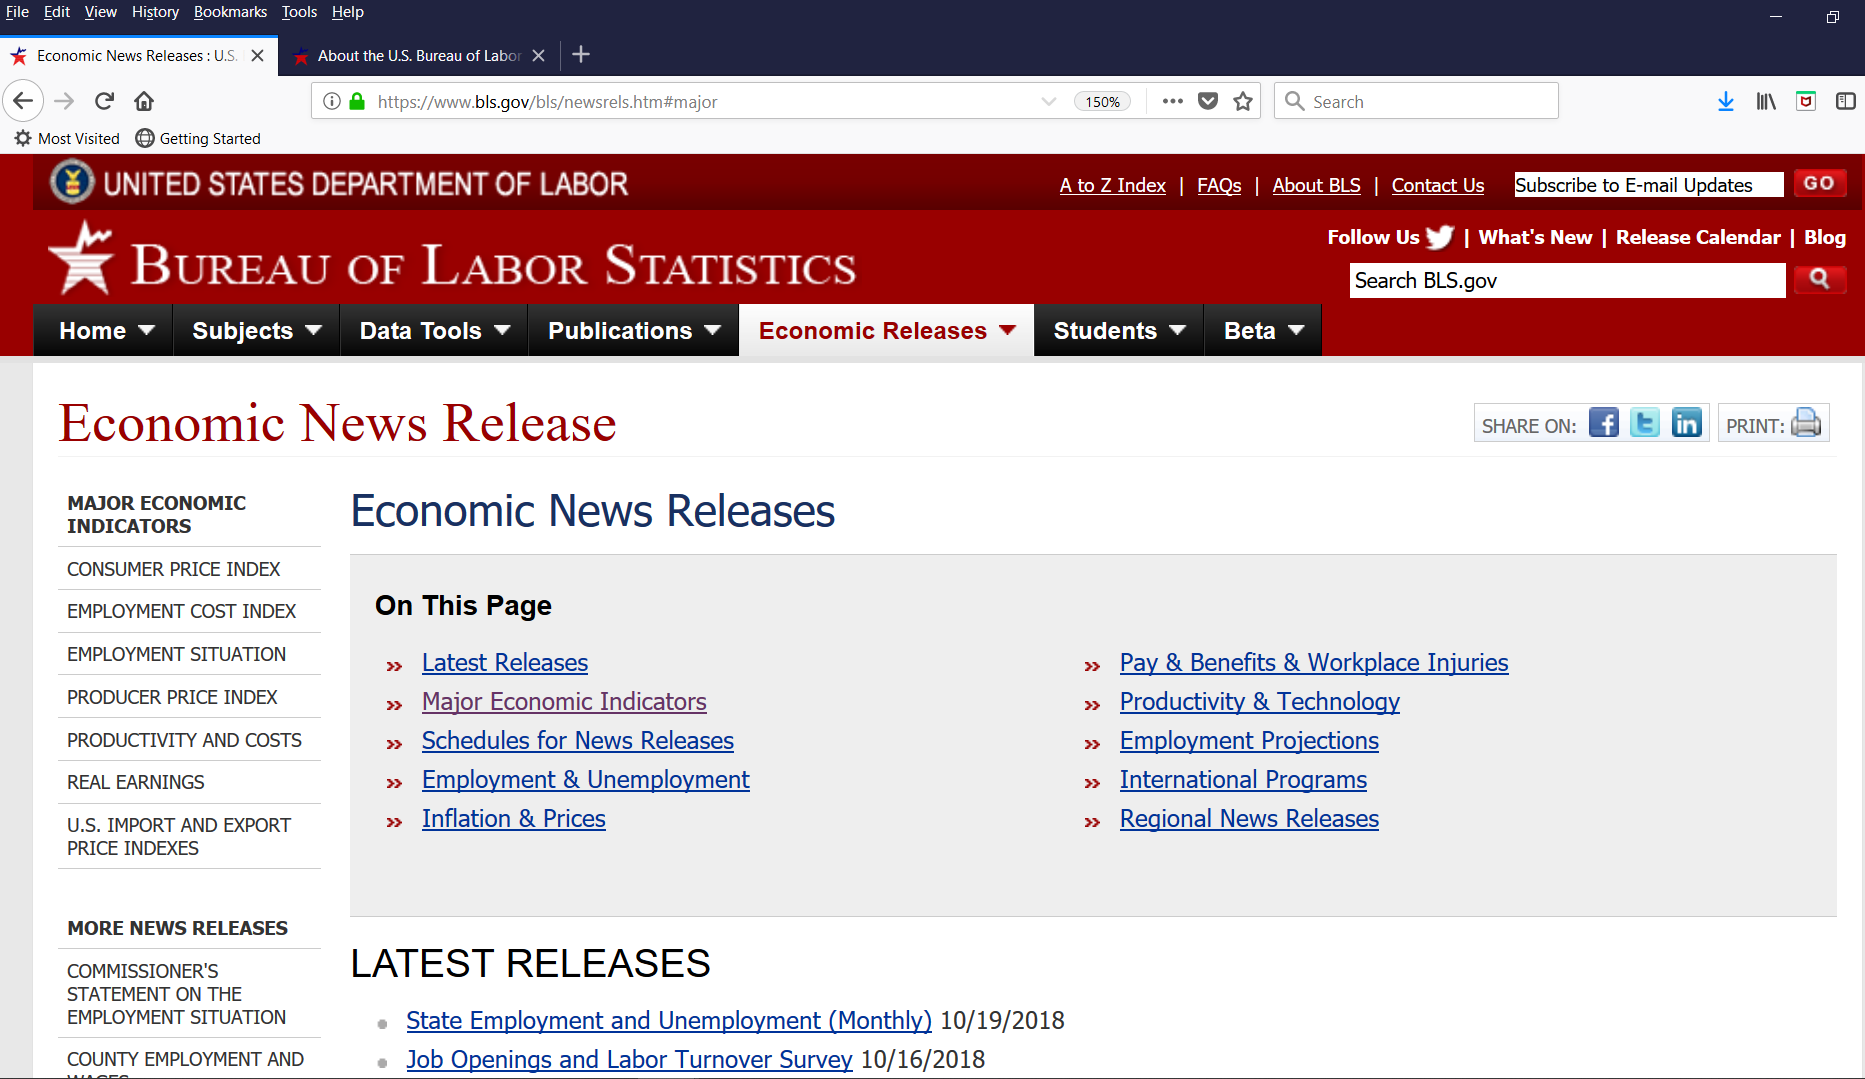

# PostgreSQL 10.5

Postgres provides few programming language constructs for complex grouping operations like ROLLUP and CUBE. You can read more about these grouping operations __[here](https://www.postgresql.org/docs/10/static/queries-table-expressions.html#QUERIES-GROUPING-SETS
)__



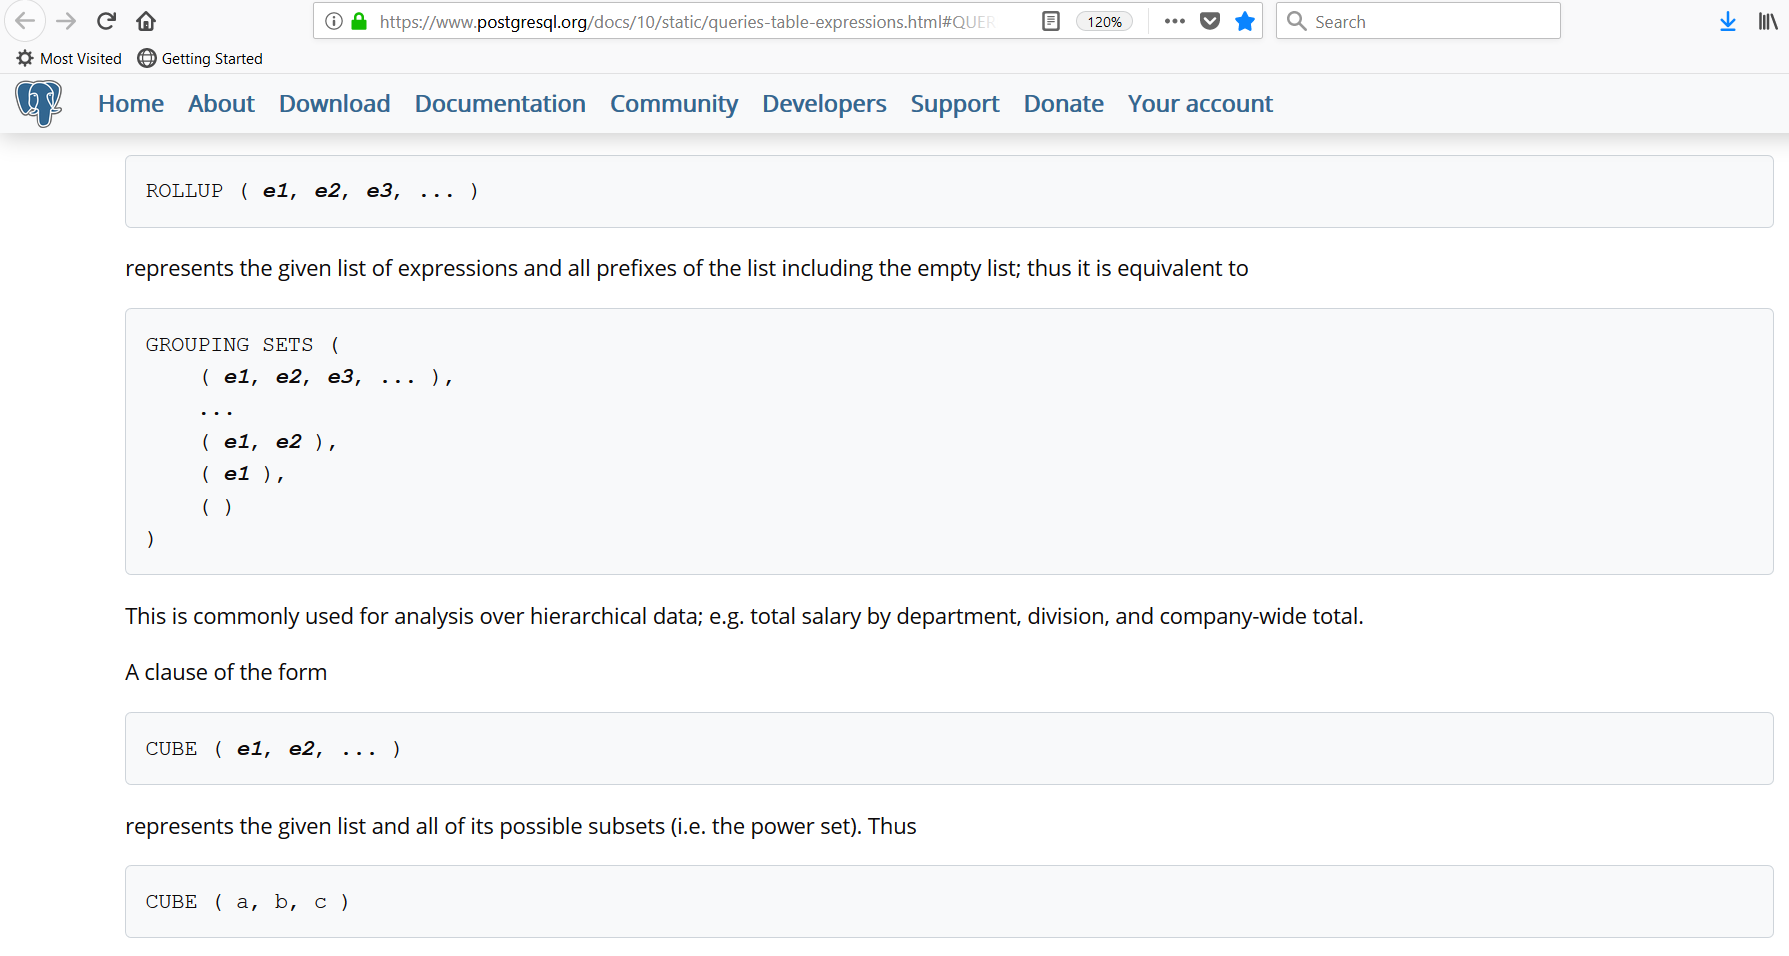




## Import the packages needed

In [1]:
import psycopg2
import csv
import pandas as pd
import numpy as np
from datetime import datetime,date
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [2]:
#setup the format for the pretty print of Total
pd.options.display.float_format = '{:20,.2f}'.format

### First, we need to connect to the postgresql10 database server
- make sure you are already connected to VPN before you execute the following command 

In [3]:
db_connection = psycopg2.connect(host='hashed',dbname="walmart", user="hashed")

cursor = db_connection.cursor()

## Query #1: 
- Get the total weekly sales by store

In [433]:
cursor.execute("SELECT Store, sum(Weekly_Sales) from weekly_sales GROUP BY Store")
rows=cursor.fetchall()

In [434]:
total_weekly_sales_by_store = pd.DataFrame(rows, columns=['Store','Total'])


total_weekly_sales_by_store.tail()

,Store,Total
40,41,"1,269,393,544.23"
41,42,"556,960,267.01"
42,43,"633,958,047.87"
43,44,"303,051,614.88"
44,45,"786,767,389.94"


## Query #2: 
- Get the total weekly sales by store and department

In [435]:
cursor.execute("SELECT Store, Dept, sum(Weekly_Sales) from weekly_sales GROUP BY Store, Dept")
rows=cursor.fetchall()

In [436]:
total_weekly_sales_by_store_dept = pd.DataFrame(rows, columns=['Store','Department','Total'])

total_weekly_sales_by_store_dept = total_weekly_sales_by_store_dept.sort_values(by=['Store', 'Department'])

total_weekly_sales_by_store_dept

,Store,Department,Total
11,1,1,"22,535,836.26"
2015,1,2,"46,148,192.51"
672,1,3,"13,163,628.52"
303,1,4,"37,001,118.63"
35,1,5,"24,282,199.06"
...,...,...,...
1031,45,94,"3,461,475.22"
1447,45,95,"52,949,062.81"
749,45,96,41.58
55,45,97,"6,473,428.85"


## Query #3: 
- Get the total weekly sales by store and week

In [437]:
cursor.execute("SELECT Store, Date, sum(Weekly_Sales) from weekly_sales GROUP BY Store, Date")
rows=cursor.fetchall()

In [438]:
total_weekly_sales_by_store_dept = pd.DataFrame(rows, columns=['Store','Date','Total']) 

total_weekly_sales_by_store_dept = total_weekly_sales_by_store_dept.sort_values(by=['Store', 'Date'])


total_weekly_sales_by_store_dept

,Store,Date,Total
3874,1,2010-02-05,"11,505,836.30"
2271,1,2010-02-12,"11,493,702.08"
4072,1,2010-02-19,"11,283,777.19"
855,1,2010-02-26,"9,868,093.13"
2331,1,2010-03-05,"10,883,646.76"
...,...,...,...
2566,45,2012-09-28,"4,992,217.65"
3423,45,2012-10-05,"5,134,185.49"
5940,45,2012-10-12,"5,141,250.52"
5851,45,2012-10-19,"5,026,878.71"


## Query #4: 
- Get the total weekly sales by department and week

In [439]:
cursor.execute("SELECT Dept, Date, sum(Weekly_Sales) from weekly_sales GROUP BY Dept, Date")
rows=cursor.fetchall()

In [440]:
total_weekly_sales_by_dept_date = pd.DataFrame(rows, columns=['Dept','Date','Total']) 

total_weekly_sales_by_dept_date = total_weekly_sales_by_dept_date.sort_values(by=['Dept', 'Date'])


total_weekly_sales_by_dept_date

,Dept,Date,Total
8953,1,2010-02-05,"6,172,833.87"
7577,1,2010-02-12,"10,200,276.80"
9110,1,2010-02-19,"7,827,801.52"
6345,1,2010-02-26,"4,769,741.06"
2019,1,2010-03-05,"5,338,567.99"
...,...,...,...
4855,99,2012-09-28,0.07
8752,99,2012-10-05,"81,110.19"
2196,99,2012-10-12,"14,174.51"
9054,99,2012-10-19,0.21


## Query #5: 
- Get the total weekly sales using **ROLLUP** clause for the hierarchical data: store, department and week

In [441]:
cursor.execute("SELECT Store, Dept, Date, sum(Weekly_Sales) from weekly_sales GROUP BY ROLLUP(Store, Dept, Date)")
rows=cursor.fetchall()

In [442]:
rollup_by_store_dept_date = pd.DataFrame(rows, columns=['Store','Dept','Date','Total']) 

#For the pretty print : Replace NaN by -1

rollup_by_store_dept_date['Store'] = rollup_by_store_dept_date['Store'].replace(np.nan,-1) 
rollup_by_store_dept_date['Dept'] = rollup_by_store_dept_date['Dept'].replace(np.nan,-1) 

#type conversion of values returned by ROLLUP

rollup_by_store_dept_date['Store'] = rollup_by_store_dept_date['Store'].astype(int)
rollup_by_store_dept_date['Dept'] = rollup_by_store_dept_date['Dept'].astype(int)
rollup_by_store_dept_date['Total'] = rollup_by_store_dept_date['Total'].astype(np.float64)


#For the pretty print: Replace -1  by BLANK for Store and department
rollup_by_store_dept_date['Store'].replace(-1,'',inplace=True)
rollup_by_store_dept_date['Dept'].replace(-1,'',inplace=True)

#For the pretty print: Replace NaN  by BLANK for date
rollup_by_store_dept_date['Date'] = rollup_by_store_dept_date['Date'].dt.date
rollup_by_store_dept_date['Date'].replace(np.nan,'',inplace=True)
    

rollup_by_store_dept_date = rollup_by_store_dept_date.sort_values(by=['Store', 'Dept', 'Date'])


rollup_by_store_dept_date

,Store,Dept,Date,Total
0,1,1,2010-02-05,"174,471.50"
1,1,1,2010-02-12,"322,276.43"
2,1,1,2010-02-19,"291,168.85"
3,1,1,2010-02-26,"135,824.78"
4,1,1,2010-03-05,"152,795.30"
...,...,...,...,...
424942,45,98,2012-10-19,"5,320.07"
424943,45,98,2012-10-26,"7,537.60"
424944,45,98,,"530,370.89"
424945,45,,,"786,767,389.94"


## Query #6: 
- Get the total weekly sales using **ROLLUP** clause for the hierarchical data: store and department

In [443]:
cursor.execute("SELECT Store, Dept, sum(Weekly_Sales) from weekly_sales GROUP BY ROLLUP(Store, Dept)")
rows=cursor.fetchall()

In [444]:
rollup_by_store_dept = pd.DataFrame(rows, columns=['Store','Dept','Total']) 

#For the pretty print : Replace NaN by -1

rollup_by_store_dept['Store'] = rollup_by_store_dept['Store'].replace(np.nan,-1) 
rollup_by_store_dept['Dept'] = rollup_by_store_dept['Dept'].replace(np.nan,-1) 

#type conversion of values returned by ROLLUP

rollup_by_store_dept['Store'] = rollup_by_store_dept['Store'].astype(int)
rollup_by_store_dept['Dept'] = rollup_by_store_dept['Dept'].astype(int)
rollup_by_store_dept['Total'] = rollup_by_store_dept['Total'].astype(np.float64)


#For the pretty print: Replace -1  by BLANK for Store and department
rollup_by_store_dept['Store'].replace(-1,'',inplace=True)
rollup_by_store_dept['Dept'].replace(-1,'',inplace=True)
    

rollup_by_store_dept = rollup_by_store_dept.sort_values(by=['Store', 'Dept'])


rollup_by_store_dept

,Store,Dept,Total
13,1,1,"22,535,836.26"
2017,1,2,"46,148,192.51"
674,1,3,"13,163,628.52"
305,1,4,"37,001,118.63"
37,1,5,"24,282,199.06"
...,...,...,...
749,45,96,41.58
57,45,97,"6,473,428.85"
2461,45,98,"530,370.89"
3344,45,,"786,767,389.94"


## Query #7: 
- Get the total weekly sales using **CUBE** clause for the hierarchical data: store, department and week

In [445]:
cursor.execute("SELECT Store, Dept, Date, sum(Weekly_Sales) from weekly_sales GROUP BY CUBE(Store, Dept, Date)")
rows=cursor.fetchall()

In [446]:
cube_by_store_dept_date = pd.DataFrame(rows, columns=['Store','Dept','Date','Total']) 

#For the pretty print : Replace NaN by -1

cube_by_store_dept_date['Store'] = cube_by_store_dept_date['Store'].replace(np.nan,-1) 
cube_by_store_dept_date['Dept'] = cube_by_store_dept_date['Dept'].replace(np.nan,-1) 

#type conversion of values returned by ROLLUP

cube_by_store_dept_date['Store'] = cube_by_store_dept_date['Store'].astype(int)
cube_by_store_dept_date['Dept'] = cube_by_store_dept_date['Dept'].astype(int)
cube_by_store_dept_date['Total'] = cube_by_store_dept_date['Total'].astype(np.float64)


#For the pretty print: Replace -1  by BLANK for Store and department
cube_by_store_dept_date['Store'].replace(-1,'',inplace=True)
cube_by_store_dept_date['Dept'].replace(-1,'',inplace=True)

#For the pretty print: Replace NaN  by BLANK for date
cube_by_store_dept_date['Date'] = cube_by_store_dept_date['Date'].dt.date
cube_by_store_dept_date['Date'].replace(np.nan,'',inplace=True)
    

cube_by_store_dept_date = cube_by_store_dept_date.sort_values(by=['Store', 'Dept', 'Date'])


cube_by_store_dept_date

,Store,Dept,Date,Total
0,1,1,2010-02-05,"174,471.50"
1,1,1,2010-02-12,"322,276.43"
2,1,1,2010-02-19,"291,168.85"
3,1,1,2010-02-26,"135,824.78"
4,1,1,2010-03-05,"152,795.30"
...,...,...,...,...
424964,,,2012-10-05,"332,966,475.17"
425074,,,2012-10-12,"322,899,599.75"
425043,,,2012-10-19,"315,856,873.99"
425063,,,2012-10-26,"318,808,814.03"


## Query #8: 
- Get  the **descriptive statistics** per store

In [447]:
cursor.execute("SELECT * from weekly_sales")
rows=cursor.fetchall()

In [448]:
weekly_sales = pd.DataFrame(rows, columns=['Store','Dept', 'Date','Weekly_Sales','IsHoliday']) 

#For the pretty print: format date with no time-field
weekly_sales['Date'] = weekly_sales['Date'].dt.date


#### DataFrame  has few good methods for descriptive statistics, grouping, and heirarchical clusterning:
- Count only non-null values, use **count**
- Count total values including null values, use **size** attribute
- Count distinct values, use **nunique**
- **stack()** on the **groupby** result will produce the pretty print

In [449]:
weekly_sales.groupby('Store').agg(['count', 'size', 'nunique', 'max']).stack()

Dept        Date         Weekly_Sales IsHoliday
Store                                                          
1     count    71708       71708            71,708.00     71708
      size     71708       71708            71,708.00     71708
      nunique     77         143            10,042.00         2
      max         99  2012-10-26           203,670.47      True
2     count    71666       71666            71,666.00     71666
...              ...         ...                  ...       ...
44    max         99  2012-10-26            66,629.98      True
45    count    67459       67459            67,459.00     67459
      size     67459       67459            67,459.00     67459
      nunique     74         143             9,381.00         2
      max         98  2012-10-26           240,758.86      True

[180 rows x 4 columns]

## Query #9: 
- Get  the top 500 weekly sales and plot them (Red color for Holiday and Blue color for Not Holiday) against the weekly Unemployment and Temperature 


In [450]:
cursor.execute("SELECT * from weekly_sales")
rows=cursor.fetchall()

In [451]:
weekly_sales = pd.DataFrame(rows, columns=['Store','Dept', 'Date','Weekly_Sales','IsHoliday']) 

weekly_sales = weekly_sales.sort_values(by=['Weekly_Sales'], ascending=False)

In [452]:
top_ten_weekly_sales = weekly_sales[:500]

top_ten_weekly_sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
1469217,10,72,2010-11-26,"693,099.36",True
1890787,10,72,2010-11-26,"693,099.36",True
204507,10,72,2010-11-26,"693,099.36",True
1047647,10,72,2010-11-26,"693,099.36",True
2312357,10,72,2010-11-26,"693,099.36",True


In [453]:
cursor.execute("SELECT * from features")
rows=cursor.fetchall()

In [454]:
weekly_sales_temp_unemp = pd.DataFrame(rows, columns=['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday'])

In [455]:
# Sanity test that we got good data from db server

weekly_sales_temp_unemp.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.57,0.00,0.00,0.00,0.00,0.00,211.10,8.11,False
1,1,2010-02-12,38.51,2.55,0.00,0.00,0.00,0.00,0.00,211.24,8.11,True
2,1,2010-02-19,39.93,2.51,0.00,0.00,0.00,0.00,0.00,211.29,8.11,False
3,1,2010-02-26,46.63,2.56,0.00,0.00,0.00,0.00,0.00,211.32,8.11,False
4,1,2010-03-05,46.50,2.62,0.00,0.00,0.00,0.00,0.00,211.35,8.11,False


In [456]:
weekly_sales_temp_unemp.groupby('Store').agg(['count', 'size', 'nunique', 'max']).stack()

Date          Temperature           Fuel_Price  \
Store                                                                          
1     count                   1274             1,274.00             1,274.00   
      size                    1274             1,274.00             1,274.00   
      nunique                  182               181.00               169.00   
      max      2013-07-26 00:00:00                91.65                 3.91   
2     count                   1274             1,274.00             1,274.00   
...                            ...                  ...                  ...   
44    max      2013-07-26 00:00:00                85.58                 3.85   
45    count                   1274             1,274.00             1,274.00   
      size                    1274             1,274.00             1,274.00   
      nunique                  182               179.00               161.00   
      max      2013-07-26 00:00:00                82.99                 4.07   

                         MarkDown1            MarkDown2            MarkDown3  \
Store                                                                          
1     count               1,274.00             1,274.00             1,274.00   
      size                1,274.00             1,274.00             1,274.00   
      nunique                91.00                73.00                89.00   
      max                72,937.29            46,011.38            74,910.32   
2     count               1,274.00             1,274.00             1,274.00   
...                            ...                  ...                  ...   
44    max                 3,297.48             1,821.61               106.31   
45    count               1,274.00             1,274.00             1,274.00   
      size                1,274.00             1,274.00             1,274.00   
      nunique                91.00                71.00                89.00   
      max                53,311.88            43,941.56            72,542.01   

                         MarkDown4            MarkDown5                  CPI  \
Store                                                                          
1     count               1,274.00             1,274.00             1,274.00   
      size                1,274.00             1,274.00             1,274.00   
      nunique                91.00                91.00               168.00   
      max                32,403.87            20,475.32               225.17   
2     count               1,274.00             1,274.00             1,274.00   
...                            ...                  ...                  ...   
44    max                    89.76             2,583.41               132.72   
45    count               1,274.00             1,274.00             1,274.00   
      size                1,274.00             1,274.00             1,274.00   
      nunique                91.00                91.00               168.00   
      max                38,157.91            17,861.50               193.59   

                      Unemployment IsHoliday  
Store                                         
1     count               1,274.00      1274  
      size                1,274.00      1274  
      nunique                15.00         2  
      max                     8.11      True  
2     count               1,274.00      1274  
...                            ...       ...  
44    max                     8.12      True  
45    count               1,274.00      1274  
      size                1,274.00      1274  
      nunique                14.00         2  
      max                     8.99      True  

[180 rows x 11 columns]

In [457]:
unemployment = []
temperature = []

for row in top_ten_weekly_sales.itertuples():
    temperature.append(weekly_sales_temp_unemp[(weekly_sales_temp_unemp.Store == row.Store) & (weekly_sales_temp_unemp.Date == row.Date)]['Temperature'].values[0])
    unemployment.append(weekly_sales_temp_unemp[(weekly_sales_temp_unemp.Store == row.Store) & (weekly_sales_temp_unemp.Date == row.Date)]['Unemployment'].values[0])



In [458]:
se_unemployment = pd.Series(unemployment)
se_temperature = pd.Series(temperature)

In [459]:
top_ten_weekly_sales.insert(loc=5, column='Unemployment', value=se_unemployment.values)
top_ten_weekly_sales.insert(loc=6, column='Temperature', value=se_temperature.values)


In [460]:
top_ten_weekly_sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Unemployment,Temperature
1469217,10,72,2010-11-26,"693,099.36",True,9.00,55.33
1890787,10,72,2010-11-26,"693,099.36",True,9.00,55.33
204507,10,72,2010-11-26,"693,099.36",True,9.00,55.33
1047647,10,72,2010-11-26,"693,099.36",True,9.00,55.33
2312357,10,72,2010-11-26,"693,099.36",True,9.00,55.33


In [461]:
top_ten_weekly_sales.describe()

,Store,Dept,Weekly_Sales,Unemployment,Temperature
count,500.00,500.00,500.00,500.00,500.00
mean,16.80,60.63,"328,468.78",8.26,47.25
std,10.15,27.06,"95,823.91",1.86,11.69
min,2.00,5.00,"240,758.86",4.42,24.76
25%,10.00,72.00,"261,136.32",7.44,40.81
50%,14.00,72.00,"296,628.29",8.07,46.67
75%,22.00,72.00,"359,995.60",8.72,56.43
max,45.00,92.00,"693,099.36",14.31,72.55


In [462]:
feature0_holiday = top_ten_weekly_sales[top_ten_weekly_sales.IsHoliday == True]['Weekly_Sales'].values
feature0_not_holiday = top_ten_weekly_sales[top_ten_weekly_sales.IsHoliday == False]['Weekly_Sales'].values

feature1_holiday = top_ten_weekly_sales[top_ten_weekly_sales.IsHoliday == True]['Unemployment'].values
feature1_not_holiday = top_ten_weekly_sales[top_ten_weekly_sales.IsHoliday == False]['Unemployment'].values

feature2_holiday = top_ten_weekly_sales[top_ten_weekly_sales.IsHoliday == True]['Temperature'].values
feature2_not_holiday = top_ten_weekly_sales[top_ten_weekly_sales.IsHoliday == False]['Temperature'].values

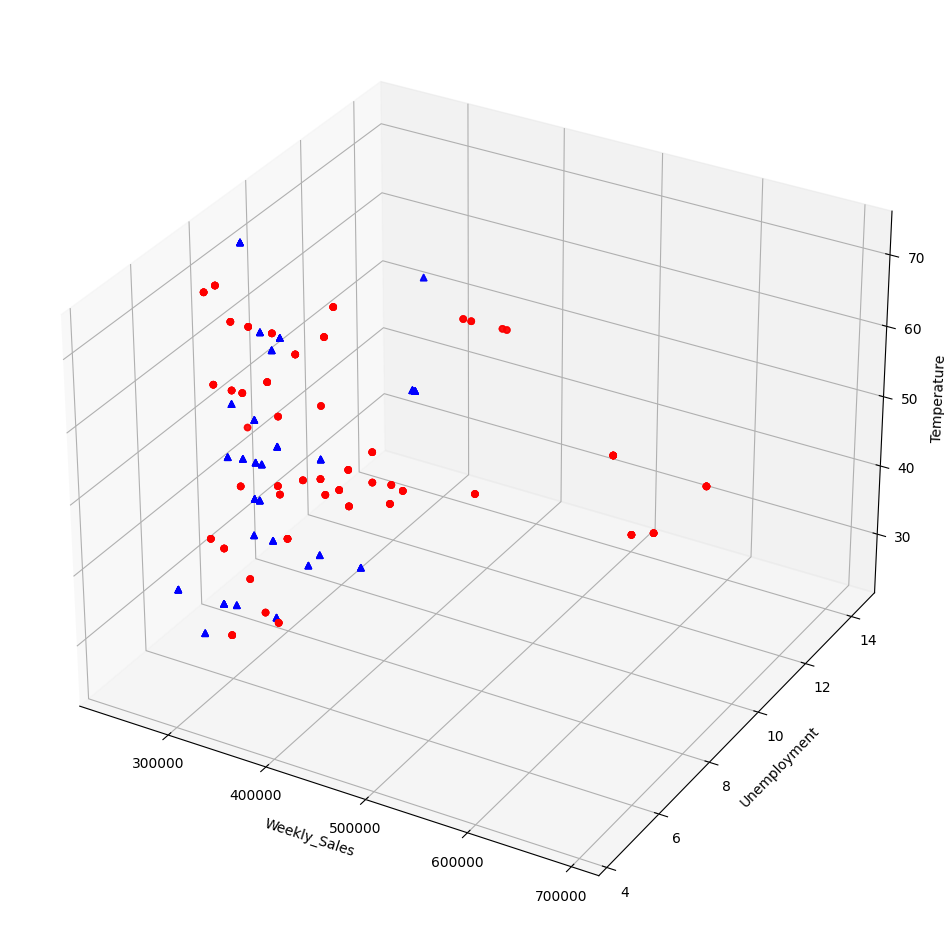

In [463]:
# Plot the raw data  

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

x_ax_holiday = np.array(feature0_holiday)
y_ax_holiday = np.array(feature1_holiday)
z_ax_holiday = np.array(feature2_holiday)

x_ax_not_holiday = np.array(feature0_not_holiday)
y_ax_not_holiday = np.array(feature1_not_holiday)
z_ax_not_holiday = np.array(feature2_not_holiday)

ax.scatter(x_ax_holiday, y_ax_holiday, z_ax_holiday, marker='o', c = 'red')
ax.scatter(x_ax_not_holiday, y_ax_not_holiday, z_ax_not_holiday, marker='^', c = 'blue')

ax.set_xlabel('Weekly_Sales')
ax.set_ylabel('Unemployment')
ax.set_zlabel('Temperature')

plt.show()

# Requirements



** The PDF document and your IPYNB script that you are submitting on Canvas must have the source code and the output for the following  requirements **


### Requirement #1: 
- Discuss the difference between **ROLLUP** and the **CUBE** that can be used in the **Group By** clause of the **SQL-SELECT** statement in PostgreSQL 10.5. 

<u> Response </u>

In PostgreSQL, ROLLUP and CUBE are both used in the GROUP BY clause to perform aggregation and to generate summary results. They do serve different purposes and produce different levels of detail in the result sets.

**ROLLUP:**

1. ROLLUP is an operator that generates subtotals and grand totals within a result set.
2. It is used to create a hierarchical result set with multiple levels of aggregation.
3. ROLLUP produces subtotals for each level of grouping, moving from left to right in the grouping columns.
4. The last row of the result set typically represents the grand total.
5. ROLLUP can be useful when you want to see a summary of data with subtotals at various levels of aggregation.

In [464]:
# SQL Query
cursor.execute("""SELECT Store, Dept, SUM(weekly_sales) as Total_Sales
               FROM weekly_sales
               GROUP BY ROLLUP (Store, Dept);""")
rows=cursor.fetchall()

# Passing results to a pandas data frame
rollup_data = pd.DataFrame(rows, columns=['Store','Dept', 'Total_Sales']) 

# Replacing NaN by -1
rollup_data['Store'] = rollup_data['Store'].replace(np.nan,-1) 
rollup_data['Dept'] = rollup_data['Dept'].replace(np.nan,-1) 

# Type conversion of values returned by ROLLUP
rollup_data['Store'] = rollup_data['Store'].astype(int)
rollup_data['Dept'] = rollup_data['Dept'].astype(int)
rollup_data['Total_Sales'] = rollup_data['Total_Sales'].astype(np.float64)

# Replacing -1 by BLANK for Store and department
rollup_data['Store'].replace(-1,'',inplace=True)
rollup_data['Dept'].replace(-1,'',inplace=True)

# Sorting values for better interpretation
rollup_data = rollup_data.sort_values(by=['Store', 'Dept'])

display(rollup_data)

,Store,Dept,Total_Sales
13,1,1,"22,535,836.26"
2017,1,2,"46,148,192.51"
674,1,3,"13,163,628.52"
305,1,4,"37,001,118.63"
37,1,5,"24,282,199.06"
...,...,...,...
749,45,96,41.58
57,45,97,"6,473,428.85"
2461,45,98,"530,370.89"
3344,45,,"786,767,389.94"


<i> In the above code, we were able to generate subtotals at two levels: one for the "Store" level and another for the total sales. It starts with subtotals for each unique combination of "Store" and "Dept" and then provides a subtotal for each unique "Store" (e.g., Store 1, Store 2 etc.). Finally, it gives the grand total by omitting both "Category" and "Subcategory." </i>

**CUBE:**

1. CUBE is also used for multi-dimensional analysis but is more extensive compared to ROLLUP
2. It generates all possible combinations of subtotals and the grand total and allows you to see data from various angles.

In [465]:
# SQL Query
cursor.execute("""SELECT Store, Dept, SUM(weekly_sales) as Total_Sales
               FROM weekly_sales
               GROUP BY CUBE (Store, Dept);""")
rows=cursor.fetchall()

# Passing results to a pandas data frame
CUBE_data = pd.DataFrame(rows, columns=['Store','Dept', 'Total_Sales']) 

# Replacing NaN by -1
CUBE_data['Store'] = CUBE_data['Store'].replace(np.nan,-1) 
CUBE_data['Dept'] = CUBE_data['Dept'].replace(np.nan,-1) 

# Type conversion of values returned by CUBE
CUBE_data['Store'] = CUBE_data['Store'].astype(int)
CUBE_data['Dept'] = CUBE_data['Dept'].astype(int)
CUBE_data['Total_Sales'] = CUBE_data['Total_Sales'].astype(np.float64)

# Replacing -1 by BLANK for Store and department
CUBE_data['Store'].replace(-1,'',inplace=True)
CUBE_data['Dept'].replace(-1,'',inplace=True)

# Sorting values for better interpretation
CUBE_data = CUBE_data.sort_values(by=['Store', 'Dept'])

display(CUBE_data)

,Store,Dept,Total_Sales
13,1,1,"22,535,836.26"
2017,1,2,"46,148,192.51"
674,1,3,"13,163,628.52"
305,1,4,"37,001,118.63"
37,1,5,"24,282,199.06"
...,...,...,...
3385,,96,"516,837,413.12"
3403,,97,"626,475,583.30"
3410,,98,"278,802,435.59"
3414,,99,"2,507,048.95"


<i> In the CUBE result, we have subtotals at three levels: one for each dimension (Store, Dept) and the total sales. It provides subtotals for all possible combinations of "Store" and "Dept." It also provides subtotals for each unique "Store" (e.g., Store 1, Store 2) and each unique "Department" (e.g., Dept 1, Dept 2). Finally, it gives the grand total by omitting both "Store" and "Dept." </i>

### Requirement #2: 
- Get the descriptive statistics per department

In [466]:
# SQL Query
cursor.execute("SELECT * from weekly_sales")
rows=cursor.fetchall()

# Passing results to a pandas data frame
dept_statistics = pd.DataFrame(rows, columns=['Store','Dept', 'Date', 'Weekly_Sales', 'IsHoliday']) 

# Formatting date with no time-field
dept_statistics['Date'] = dept_statistics['Date'].dt.date

In [467]:
# Grouping statistics by department
grouped_dept_statistics = dept_statistics.groupby(['Dept']).agg(['count', 'size', 'nunique', 'max', 'min']).stack()
display(grouped_dept_statistics)

Store        Date         Weekly_Sales IsHoliday
Dept                                                          
1    count    45045       45045            45,045.00     45045
     size     45045       45045            45,045.00     45045
     nunique     45         143             6,427.00         2
     max         45  2012-10-26           172,225.55      True
     min          1  2010-02-05               711.11     False
...             ...         ...                  ...       ...
99   count     6034        6034             6,034.00      6034
     size      6034        6034             6,034.00      6034
     nunique     37          94               311.00         2
     max         44  2012-10-26            12,550.00      True
     min          1  2010-02-05              -147.00     False

[405 rows x 4 columns]

### Requirement #3: 
- Use the **CUBE** and dataframe to produce a listing of total sales per department across the entire list of stores

In [468]:
# SQL query
cursor.execute("""SELECT Store, Dept, sum(Weekly_Sales) 
               FROM weekly_sales GROUP BY CUBE(Store, Dept)""")
rows=cursor.fetchall()

# Passing results to a pandas data frame
cube_by_store_dept = pd.DataFrame(rows, columns=['Store', 'Dept', 'Total']) 

# Replacing NaN by -1
cube_by_store_dept['Store'] = cube_by_store_dept['Store'].replace(np.nan,-1) 
cube_by_store_dept['Dept'] = cube_by_store_dept['Dept'].replace(np.nan,-1) 

# Type conversion of values returned by ROLLUP
cube_by_store_dept['Store'] = cube_by_store_dept['Store'].astype(int)
cube_by_store_dept['Dept'] = cube_by_store_dept['Dept'].astype(int)
cube_by_store_dept['Total'] = cube_by_store_dept['Total'].astype(np.float64)

# Replacing -1 by BLANK for Store and department
cube_by_store_dept['Store'].replace(-1,'',inplace=True)
cube_by_store_dept['Dept'].replace(-1,'',inplace=True)

# Sorting values for better interpretation
cube_by_store_dept = cube_by_store_dept.sort_values(by=['Store', 'Dept'])

# Displaying sample data
display(cube_by_store_dept.head())

,Store,Dept,Total
13,1,1,"22,535,836.26"
2017,1,2,"46,148,192.51"
674,1,3,"13,163,628.52"
305,1,4,"37,001,118.63"
37,1,5,"24,282,199.06"


## Requirement #4: 

- Use the **CUBE** and dataframe to produce a listing of total sales per store across the entire list of departments for the week of 2010-02-19

In [469]:
# SQL query
cursor.execute("""SELECT Dept, Store, SUM(weekly_sales) as Total_Sales 
                FROM weekly_sales
                WHERE TO_CHAR(DATE(date), 'YYYY-MM-DD') = '2010-02-19'
                GROUP BY CUBE(Dept, Store)
                ORDER BY Dept, Store;
               """)
rows=cursor.fetchall()

# Passing results to a pandas data frame
cube_by_dept_store_2010_02_19 = pd.DataFrame(rows, columns=['Dept', 'Store', 'Total']) 

# Replacing NaN by -1
cube_by_dept_store_2010_02_19['Store'] = cube_by_dept_store_2010_02_19['Store'].replace(np.nan,-1) 
cube_by_dept_store_2010_02_19['Dept'] = cube_by_dept_store_2010_02_19['Dept'].replace(np.nan,-1) 

# Type conversion of values returned by ROLLUP
cube_by_dept_store_2010_02_19['Store'] = cube_by_dept_store_2010_02_19['Store'].astype(int)
cube_by_dept_store_2010_02_19['Dept'] = cube_by_dept_store_2010_02_19['Dept'].astype(int)
cube_by_dept_store_2010_02_19['Total'] = cube_by_dept_store_2010_02_19['Total'].astype(np.float64)

# Replacing -1 by BLANK for Store and department
cube_by_dept_store_2010_02_19['Store'].replace(-1,'',inplace=True)
cube_by_dept_store_2010_02_19['Dept'].replace(-1,'',inplace=True)

# Sorting values for better interpretation
cube_by_dept_store_2010_02_19 = cube_by_dept_store_2010_02_19.sort_values(by=['Dept', 'Store'])

# Displaying sample data
display(cube_by_dept_store_2010_02_19.head())

,Dept,Store,Total
0,1,1,"291,168.85"
1,1,2,"407,550.64"
2,1,3,"62,428.17"
3,1,4,"349,559.63"
4,1,5,"79,923.69"


## Requirement #5: 

- Use the **CUBE** and dataframe to produce a listing of total sales per department across the entire list of stores for the week of 2010-02-19

In [470]:
# SQL Query
cursor.execute("""SELECT Store, Dept, SUM(weekly_sales) as Total_Sales 
                FROM weekly_sales
                WHERE TO_CHAR(DATE(date), 'YYYY-MM-DD') = '2010-02-19'
                GROUP BY CUBE(Store, Dept)
                ORDER BY Store, Dept;
               """)
rows=cursor.fetchall()

cube_by_store_dept_2010_02_19 = pd.DataFrame(rows, columns=['Store', 'Dept', 'Total']) 

# Replace NaN by -1

cube_by_store_dept_2010_02_19['Store'] = cube_by_store_dept_2010_02_19['Store'].replace(np.nan,-1) 
cube_by_store_dept_2010_02_19['Dept'] = cube_by_store_dept_2010_02_19['Dept'].replace(np.nan,-1) 

# Type conversion of values returned by ROLLUP
cube_by_store_dept_2010_02_19['Store'] = cube_by_store_dept_2010_02_19['Store'].astype(int)
cube_by_store_dept_2010_02_19['Dept'] = cube_by_store_dept_2010_02_19['Dept'].astype(int)
cube_by_store_dept_2010_02_19['Total'] = cube_by_store_dept_2010_02_19['Total'].astype(np.float64)

# Replace -1 with BLANK for Store and Department
cube_by_store_dept_2010_02_19['Store'].replace(-1,'',inplace=True)
cube_by_store_dept_2010_02_19['Dept'].replace(-1,'',inplace=True)

# Sorting values for better interpretation
cube_by_store_dept_2010_02_19 = cube_by_store_dept_2010_02_19.sort_values(by=['Store', 'Dept'])

# Displaying sample data
display(cube_by_store_dept_2010_02_19.head())

,Store,Dept,Total
0,1,1,"291,168.85"
1,1,2,"335,502.23"
2,1,3,"80,664.29"
3,1,4,"257,788.65"
4,1,5,"185,277.89"




## Requirement #6: 

- Get  the top 500 weekly sales and plot them (Red color for Unemployment greater than or equal to 5 and Green color if it is less than 5) against the weekly Unemployment and Temperature 


In [471]:
# SQL Query to produce the weekly sales table
cursor.execute("SELECT * from weekly_sales")
rows=cursor.fetchall()

In [472]:
# Passing the weekly sales table to a pandas data frame
weekly_sales = pd.DataFrame(rows, columns=['Store','Dept', 'Date','Weekly_Sales','IsHoliday']) 

# Fixing data type for Date column
weekly_sales['Date'] = pd.to_datetime(weekly_sales['Date'])

# Sorting by value in descending order for better data management
weekly_sales = weekly_sales.sort_values(by=['Weekly_Sales'], ascending=False)


In [473]:
# Passing the top 500 sales weeks to a new dataframe
top_500_weekly_sales = weekly_sales[:500]

top_500_weekly_sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
1469217,10,72,2010-11-26,"693,099.36",True
1890787,10,72,2010-11-26,"693,099.36",True
204507,10,72,2010-11-26,"693,099.36",True
1047647,10,72,2010-11-26,"693,099.36",True
2312357,10,72,2010-11-26,"693,099.36",True


In [474]:
# SQL query to produce the features table
cursor.execute("SELECT Store, Date, Temperature, Unemployment from features")
rows=cursor.fetchall()

In [475]:
# Passing the features table to a pandas data frame
weekly_sales_temp_unemp_redgreen = pd.DataFrame(rows, columns=['Store', 'Date', 'Temperature', 'Unemployment'])

In [476]:
# Sanity test that we got good data from db server
weekly_sales_temp_unemp_redgreen.head()

,Store,Date,Temperature,Unemployment
0,1,2010-02-05,42.31,8.11
1,1,2010-02-12,38.51,8.11
2,1,2010-02-19,39.93,8.11
3,1,2010-02-26,46.63,8.11
4,1,2010-03-05,46.50,8.11


In [477]:
# Creating empty lists to house unemployment and temperature data
unemployment2 = []
temperature2 = []

for row in top_500_weekly_sales.itertuples():
    temperature2.append(weekly_sales_temp_unemp_redgreen[(weekly_sales_temp_unemp_redgreen.Store == row.Store) & (weekly_sales_temp_unemp_redgreen.Date == row.Date)]['Temperature'].values[0])
    unemployment2.append(weekly_sales_temp_unemp_redgreen[(weekly_sales_temp_unemp_redgreen.Store == row.Store) & (weekly_sales_temp_unemp_redgreen.Date == row.Date)]['Unemployment'].values[0])

In [478]:
# Passing data to pandas series 
top_500_unemployment = pd.Series(unemployment2)
top_500_temperature = pd.Series(temperature2)

In [479]:
# Importing series into data frame
top_500_weekly_sales.insert(loc=5, column='Unemployment', value=top_500_unemployment.values)
top_500_weekly_sales.insert(loc=6, column='Temperature', value=top_500_temperature.values)

In [480]:
# Displaying top 5 weekly sales
display(top_500_weekly_sales.head())

,Store,Dept,Date,Weekly_Sales,IsHoliday,Unemployment,Temperature
1469217,10,72,2010-11-26,"693,099.36",True,9.00,55.33
1890787,10,72,2010-11-26,"693,099.36",True,9.00,55.33
204507,10,72,2010-11-26,"693,099.36",True,9.00,55.33
1047647,10,72,2010-11-26,"693,099.36",True,9.00,55.33
2312357,10,72,2010-11-26,"693,099.36",True,9.00,55.33


In [481]:
# Creating features to be plotted
feature0_unempgrt5 = top_500_weekly_sales[top_500_weekly_sales.Unemployment > 5]['Weekly_Sales'].values
feature0_unempless5 = top_500_weekly_sales[top_500_weekly_sales.Unemployment <= 5]['Weekly_Sales'].values

feature1_unempgrt5 = top_500_weekly_sales[top_500_weekly_sales.Unemployment > 5]['Unemployment'].values
feature1_unempless5 = top_500_weekly_sales[top_500_weekly_sales.Unemployment <= 5]['Unemployment'].values

feature2_unempgrt5 = top_500_weekly_sales[top_500_weekly_sales.Unemployment > 5]['Temperature'].values
feature2_unempless5 = top_500_weekly_sales[top_500_weekly_sales.Unemployment <= 5]['Temperature'].values

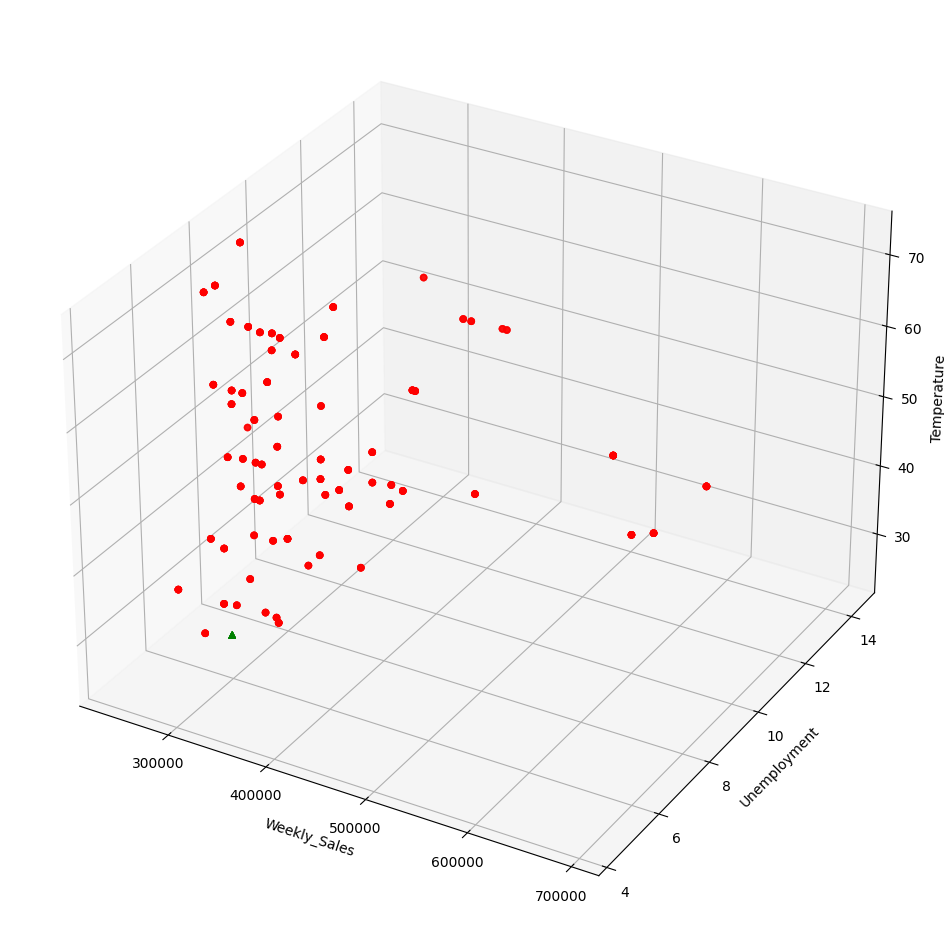

In [482]:
# Creating plot
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

# Plotting unemployment greater than 5 data
x_ax_unempgrt5 = np.array(feature0_unempgrt5)
y_ax_unempgrt5 = np.array(feature1_unempgrt5)
z_ax_unempgrt5 = np.array(feature2_unempgrt5)

# Plotting unemployment less than 5 data
x_ax_unempless5 = np.array(feature0_unempless5)
y_ax_unempless5 = np.array(feature1_unempless5)
z_ax_unempless5 = np.array(feature2_unempless5)

ax.scatter(x_ax_unempgrt5, y_ax_unempgrt5, z_ax_unempgrt5, marker='o', c = 'red')
ax.scatter(x_ax_unempless5, y_ax_unempless5, z_ax_unempless5, marker='^', c = 'green')

ax.set_xlabel('Weekly_Sales')
ax.set_ylabel('Unemployment')
ax.set_zlabel('Temperature')

plt.show()